In [12]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
import scipy.stats as stats
!pip install openpyxl==3.1.2

# Day 07 - MATH/PHYS 241

Along with derivatives, integrals are a key component of calculus and something we may want to do for one reason or another. We will cover a few different approaches to accomplishing [numerical integration](https://en.wikipedia.org/wiki/Numerical_integration), generally referred to as [quadrature](https://en.wikipedia.org/wiki/Quadrature_(geometry)). All of them are fairly similar, though there are such a plethora of them because no one method works best for all cases. This is, of course, the theme we keep coming back to in this course. You're going to need to choose which method works best for your particular problem.

Let's make a plot to remind ourselves of what integration really is: the area under the curve.

First, let's choose a function:

$$
\begin{align}
f(x) = 3x^2 - 6x^3 + 3.2x^4 \tag{1}
\end{align}
$$

(0.19999999999999998, 1.2000000000000002)

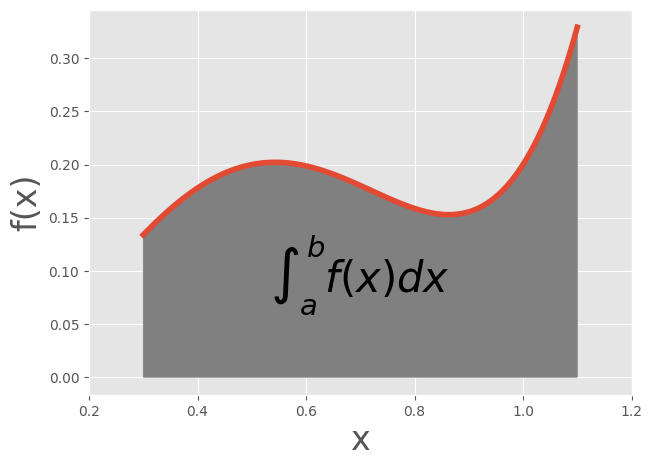

In [13]:
# define x values
a = 0.3
b = 1.1
x = np.linspace(a, b, 100)

# define function f
f = 3*x**2 - 6*x**3 + 3.2*x**4

# create figure
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.style.use('ggplot')

fig,ax = plt.subplots()
verts = [(a, 0)] + list(zip(x, f)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.5', edgecolor='0.5')
ax.add_patch(poly)
plt.plot(x,f,linewidth=4)
plt.text((b-a)/2.+a,0.08,r"$\int_a^b f(x) dx$",fontsize=30,horizontalalignment='center')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.xlim(a - 0.1, b + 0.1)

Let's revisit this plot, but add a set of lines representing the points $x_i$ where we're going to evaluate the function to approximate the shaded area:

(0.2, 1.2)

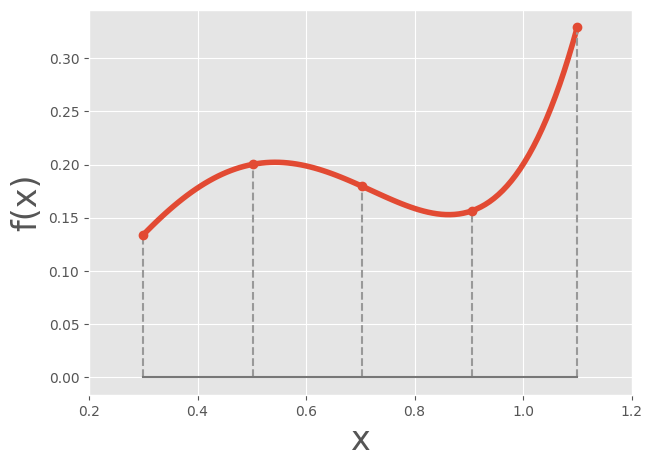

In [14]:
plt.figure()
plt.plot(x,f,linewidth=4)
m,s,b = plt.stem(list(x[::25])+[x[-1],],list(f[::25])+[f[-1],])

s.set_colors('0.6')
s.set_linestyles('--')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.xlim(0.2,1.2)

Clearly, we need a way of constructing tops to those intervals such that they closely approximate $f(x)$, but also have areas we can calculate trivially. One of the simplest ways to do this is to construct trapezoids by simply drawing straight lines between the selected points $f(x_i)$:

(0.2, 1.2)

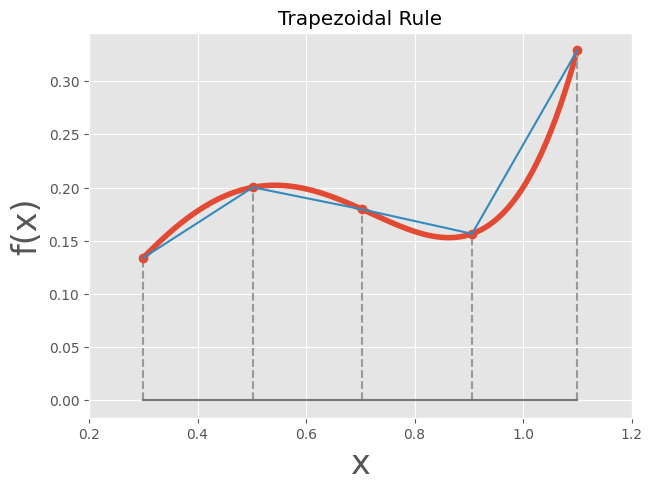

In [15]:
plt.figure()
plt.plot(x,f,linewidth=4)
m,s,b = plt.stem(list(x[::25])+[x[-1],],list(f[::25])+[f[-1],])
plt.plot(list(x[::25])+[x[-1],],list(f[::25])+[f[-1],])

s.set_colors('0.6')
s.set_linestyles('--')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.title("Trapezoidal Rule")
plt.xlim(0.2,1.2)

Now we just need to find the area of each trapezoid and sum them together. This is called the *Trapezoidal Rule* for numerical integration.

# Trapezoidal Rule

For our first method, we will consider *evenly spaced* points $x_i$ at which we evaluate our function. We will include the end points $[a, b]$, so the $N$ points are chosen such that:

$$
\begin{align}
h &= \frac{b-a}{N-1} \tag{2}
\end{align}
$$

Let's first consider the basic trapezoidal rule, in which we use only two points to compute the integral: $x_1 = a$ and $x_2 = b$.

(0.2, 1.2)

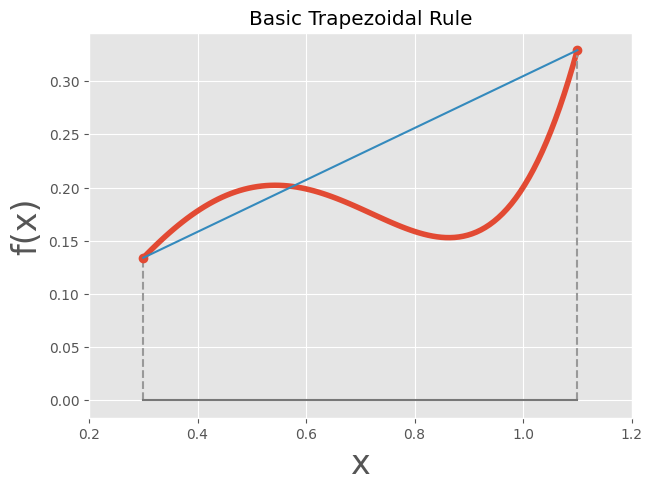

In [16]:
plt.figure()
plt.plot(x,f,linewidth=4)
m,s,b = plt.stem([x[0],x[-1]],[f[0],f[-1]])
plt.plot([x[0],x[-1]],[f[0],f[-1]])

s.set_colors('0.6')
s.set_linestyles('--')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.title("Basic Trapezoidal Rule")
plt.xlim(0.2,1.2)

Now, we calculate the area under the blue curve. There are many ways to see this, but the simplest is that the area of the trapezoid is equal to the area of the rectangle with height equal to the average of the two sides: $A = h((f(b) + f(a))/2)$. Again, $h$ is the width of the rectangle.

$$
\begin{align}
A = \int_a^b f(x) dx &= h \left( \frac{1}{2}f(a) + \frac{1}{2}f(b) \right) \tag{3}
\end{align}
$$

This approximation would be poor... but if we remember the following rule with integrals:

$$
\begin{align}
\int_a^c f(x) dx &= \int_a^b f(x) dx + \int_b^c f(x) dx \tag{4}
\end{align}
$$

Which is true as long as $a<b<c$. This means we can extend the trapezoidal rule to more than two points by simply summing up a bunch of smaller intervals:

$$
\begin{align}
\int_a^b f(x) dx &= \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx \tag{5} \\
\\
&= h \left( \frac{1}{2}f(x_0) + \frac{1}{2}f(x_1) \right) + h \left( \frac{1}{2}f(x_1) + \frac{1}{2}f(x_2) \right) \tag{6} \\
\\
&= h \left( \frac{1}{2}f(x_0) + f(x_1) + \frac{1}{2}f(x_2) \right) \tag{7}
\end{align}
$$

From equation 7, we see the *weights* of the trapazoid rule:

$$
\begin{align}
w_i &= \left( \frac{h}{2}, h, ..., h, \frac{h}{2} \right) \tag{8}
\end{align}
$$

Because the center rectangles get counted twice (equation 7) relative to the end rectangles, we weight the end rectangles half as much as the middle.

To implement the trapezoid rule, we can create a simple function:

In [17]:
def qtrap(f,a,b,N):
    """qtrap evaluates the trapezoidal rule approximation to the integral of f(x) on the interval [a, b] using N points.

    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples

    """

    # first we define h.
    h = (b-a)/(N-1)

    # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    x = a + np.arange(N)*h

    # create the weighting function, changing the first and last weights
    w = h*np.ones(N)
    w[0] *= 0.5
    w[-1] *= 0.5

    data = f(x) # f is a function that we "pass" into the qtrap; here we have it evaluate at every point in x,
                # storing the results in a new numpy array I called "data"

    # this is the actual integral: data*w is a new numpy array
    # of the same length as data and w, which I call "integrand"
    integrand = data*w

    # numpy arrays can sum themeselves by calling their .sum() method:
    integral = integrand.sum()

    return integral

We can test out our function on a simple function like $\sin x$ evaluated between $0$ and $\pi$ for which we can compare to a known result: $2$

In [18]:
res_trap = qtrap(np.sin,0,np.pi,1000)

print("The result of our qtrap integral:", res_trap)

The result of our qtrap integral: 1.9999983517708517


# Simpson's Rule

Another useful method to perform numerical integration is called [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule). This method is similar to the Trapezoidal Rule in that we want evenly spaced $x_i$, including the endpoints $a$ and $b$. However, instead of fitting a straight line between points, we are going to fit a parabola:

$$
\begin{align}
f(x) \simeq \alpha x^2 + \beta x + \gamma \tag{9}
\end{align}
$$

We want to find the area under the parabola for each interval:

$$
\begin{align}
\int_{x_i}^{x_{i+h}} (\alpha x^2 + \beta x + \gamma) dx &= \frac{\alpha x^3}{3} + \frac{\beta x^2}{2} + \gamma x \bigg\rvert^{x_{i+h}}_{x_i} \tag{10}
\end{align}
$$

We now want to evaluate $\alpha$, $\beta$, and $\gamma$ to the values of the function we want to integrate. To do this, we consider integrating equation 10 between $-1$ and $+1$:

$$
\begin{align}
\int_{-1}^{+1} (\alpha x^2 + \beta x + \gamma) dx &= \frac{2 \alpha}{3} + 2 \gamma \tag{11}
\end{align}
$$

Keep equation 11 in mind, but now let's evaluate $f(x)$ at $x=-1$, $x=0$, and $x=1$:

$$
\begin{align}
f(-1) &= \alpha - \beta + \gamma  \\
f(0) &= \gamma \tag{12} \\
f(1) &= \alpha + \beta + \gamma
\end{align}
$$

From the equations in 12, we can do a little algebra to find:

$$
\begin{align}
\alpha &= \frac{f(1) + f(-1)}{2} - f(0) \\
\beta &= \frac{f(1) - f(-1)}{2} \tag{13} \\
\gamma &= f(0)
\end{align}
$$

Which, when combined with equation 11, we get:

$$
\begin{align}
\int_{-1}^{+1} (\alpha x^2 + \beta x + \gamma) dx &= \frac{f(-1)}{3} + \frac{4 f(0)}{3} + \frac{f(1)}{3} \tag{14}
\end{align}
$$

From equation 14, we see we can express the integral as the weighted sum of the values of the function evaluated at three points. To generalize this result to our problem of evaluating an integral, we simply need to evaluate the full integral over two separate intervals:

$$
\begin{align}
\int_{x_{i-h}}^{x_{i+h}} f(x) dx &= \int_{x_{i}}^{x_{i+h}} f(x) dx + \int_{x_{i-h}}^{x_{i}} f(x) dx \tag{15} \\
\\
&\simeq \frac{h}{3}f_{i-1} + \frac{4h}{3}f_{i} + \frac{h}{3}f_{i+1} \tag{16}
\end{align}
$$

**Important**: Simpson's Rule requires that we have an odd number $N$ to work. In order to apply Simpson's rule to the entire interval, we add up the contributions from each pair of subintervals, counting all but the first and last endpoints twice. This results in:

$$
\begin{align}
\int_{a}^{b} f(x) dx &\simeq \frac{h}{3}f_1 + \frac{4h}{3}f_2 + \frac{2h}{3}f_3 + \frac{4h}{3}f_4 + ... + \frac{4h}{3}f_{N-1} + \frac{h}{3}f_N \tag{17}
\end{align}
$$

From equation 17, we see the weights for Simpson's Rule:

$$
\begin{align}
w_i = \left( \frac{h}{3}, \frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3}, ..., \frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3}, \frac{h}{3} \right)
\end{align}
$$

Again, we can implement Simpson's Rule by creating a basic function:

In [19]:
def simps(f, a, b, N):
    """
    simps evaluates the Simpson's rule approximation to the integral of f(x)
    on the interval [a, b] using N points.

    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples

    """
    # Simpson's rule requires an odd number of points
    if N % 2 == 0:
        N += 1

    h = (b - a) / (N - 1)  # Define h
    x = a + np.arange(N) * h  # Define x values

    # Create the weighting function
    w = np.zeros(N)
    w[0] = h / 3
    w[-1] = h / 3
    w[1:-1:2] = 4 * h / 3  # Weights for odd indices
    w[2:-2:2] = 2 * h / 3  # Weights for even indices

    data = f(x)  # Evaluate f at each x
    integrand = data * w  # Multiply data and weights
    integral = integrand.sum()  # Sum to get the integral

    return integral

Testing out our function:

In [20]:
res_simps = simps(np.sin,0,np.pi,1001)

print("The result of our simps integral:", res_simps)

The result of our simps integral: 2.0000000000010822


# Gaussian Quadrature

Another common form of integration is known as [Gaussian Quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature). This version is a bit more complicated than the previous two examples, but it is worth including some description of how it works here due to how useful the method is.

In this version, we start in a similar form:

$$
\begin{align}
\int_{a}^{b} f(x)dx &\simeq \sum_{i=1}^N f(x_i)w_i \tag{18}
\end{align}
$$

But now, we have our integral equal to the sum of the the product of our function $f$ evalutated at $x_i$ and a weight at $i$.

The Gaussian Quadrature version also scales the integration so that we always integrate between $-1$ and $+1$. This means that instead of evaluating at points $x_i$, we are integrating at scaled points $y_i$.

$$
\begin{align}
\int_{-1}^{1} f(y)dy &\simeq \sum_{i=1}^N f(y_i)w^*_i \tag{18}
\end{align}
$$

Where $w^*$ is not the same weights as $w$ when the bounds of integration were from $a$ to $b$.

The points chosen for integration, $y_i$, come from the roots of the [Legendre Polynomial](https://en.wikipedia.org/wiki/Legendre_polynomials) $P_N$ of order $N$, (the number of points). The weights, $w^*_i$, are related to the derivatives of the Legendre Polynomials and are given by the somewhat complicated expression:

$$
\begin{align}
w^*_i = \frac{2}{(1-y_i^2)(P'_N(y_i))^2} \tag{19}
\end{align}
$$

We will simply use the numpy function `np.polynomial.legendre.leggauss` to get the weights and the points.

The above all looks complicated, but implementing it is actually pretty straight forward:



In [21]:
def gauss(f,a,b,N):
    y,wprime = np.polynomial.legendre.leggauss(N)
    x = 0.5*(y + 1)*(b - a) + a
    w = wprime* 0.5*(b-a)
    return (f(x)*w).sum()

Testing out our Gauss function:

In [22]:
res_gauss = gauss(np.sin,0,np.pi,1001)

print("The result of our simps integral:", res_gauss)

The result of our simps integral: 1.9999999999998366


# Monte Carlo Integration

Finally, we can use the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) to brute-force calculate integrals for us. Remember, we want to evaluate something like:

$$
\begin{align}
\int_{a}^{b} f(x)dx \tag{20}
\end{align}
$$

To brute-force the integration, we can generate $N$ random samples from a uniform distribution between $a$ and $b$. We then evaluate the function $f$ at each sample $x_i$, and finally take the average over the values:

$$
\begin{align}
\int_{a}^{b} f(x)dx &\simeq \frac{b-a}{N} \sum_{i=1}^N f(x_i) \tag{21}
\end{align}
$$

## Class Problem 1

Use the Monte Carlo Integration method integrate $\sin x$ evaluated between $0$ and $\pi$ for which we can compare to a known result: $2$.

How does the error depend on $N$?

## Class Problem 2

Use all 4 integration strategies discussed in this notebook to integrate the following function:

$$
\begin{align}
\int_0^1 e^{-t} \ dt \tag{22}
\end{align}
$$

1. Using each method, find the result for $N=3$ up to $N=1001$ (obviously include more $N$ between these two extremes).

2. Calculate the relative error, $\epsilon = \frac{|quadrature - exact|}{exact}$, for each case by comparing to the known solution.

3. Make a log-log plot of the relative error vs $N$. Do the plots show when round-off error begins to dominate? If so, when?